In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Objects to Datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = (df['job_skills'].apply(lambda skills: ast.literal_eval(skills) 
                                           if pd.notna(skills) else skills))

d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
103888,Data Analyst,Jr. Data Analyst / Full-time (Remote),"Columbia, MO",via LinkedIn,Full-time,False,"Illinois, United States",2023-02-24 00:02:40,True,True,United States,None,NaN,NaN,FlowerHire,"[sql, flow]","{'other': ['flow'], 'programming': ['sql']}"


In [4]:
df = df.drop(0)

In [6]:
df_exploded = df.explode('job_skills')

In [9]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()
type(skill_count)

pandas.core.series.Series

changed series into dataframe

In [12]:
df_skill_count = skill_count.reset_index(name='Skill Count')
df_skill_count

,job_title_short,job_skills,Skill Count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [15]:
df_skill_count = df_skill_count.sort_values(by='Skill Count', ascending=False)
df_skill_count 

,job_title_short,job_skills,Skill Count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
776,Data Engineer,linode,1
1843,Senior Data Scientist,delphi,1
1888,Senior Data Scientist,kali,1
1289,Machine Learning Engineer,powerbi,1


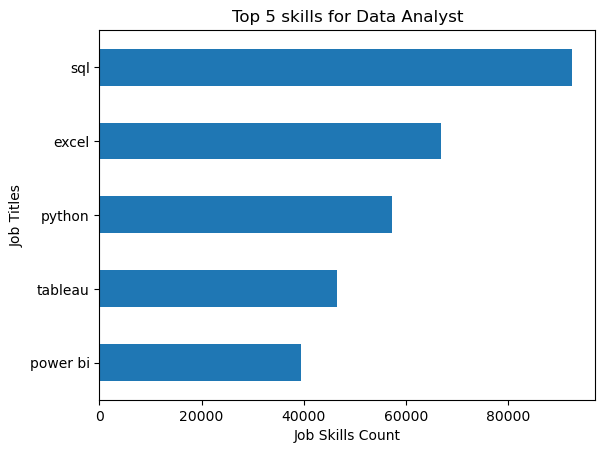

In [28]:
job_titles = 'Data Analyst'
top_skills = 5

df_skill = df_skill_count[df_skill_count['job_title_short'] == job_titles].head(top_skills)
df_skill.plot(kind='barh', x='job_skills', y='Skill Count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_titles}')
plt.xlabel('Job Skills Count')
plt.ylabel('Job Titles')
plt.legend().set_visible(False)
plt.show()


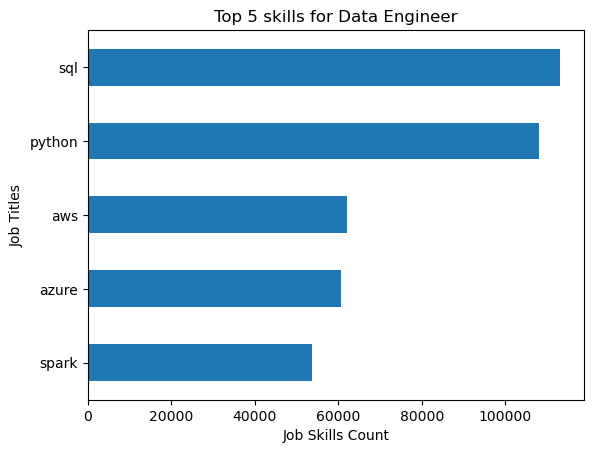

In [27]:
job_titles = 'Data Engineer'
top_skills = 5

df_skill = df_skill_count[df_skill_count['job_title_short'] == job_titles].head(top_skills)
df_skill.plot(kind='barh', x='job_skills', y='Skill Count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_titles}')
plt.xlabel('Job Skills Count')
plt.ylabel('Job Titles')
plt.legend().set_visible(False)
plt.show()